Data exploration
---

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, LineString
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle('data/processed/gdf.pkl') #created in data_preparation.ipynb
df.tail()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,passenger_count,geometry_pickup,zone_pickup,borough_pickup,dropoff_longitude,dropoff_latitude,...,JFK_airport,Newark_airport,LaGuardia_airport,is_north,dist_pickup_JFK,dist_pickup_LGA,dist_pickup_EWR,dist_dropoff_JFK,dist_dropoff_LGA,dist_dropoff_EWR
99995,9.000000,2013-09-24 07:39:00,-73.947975,40.784794,5,POINT (-73.94797515869141 40.78479385375977),East Harlem South,Manhattan,-73.964264,40.792347,...,0,0,0,0,0.217867,0.076776,0.247843,0.235218,0.094074,0.236021
99996,6.000000,2014-05-15 12:15:45,-73.962921,40.799107,1,POINT (-73.96292114257812 40.79910659790039),Manhattan Valley,Manhattan,-73.974174,40.786488,...,0,0,0,0,0.238528,0.094282,0.240212,0.239437,0.102984,0.224555
99997,5.000000,2015-02-19 17:40:43,-73.996773,40.723549,1,POINT (-73.99677276611328 40.72354888916016),Little Italy/NoLiTa,Manhattan,-73.991974,40.724724,...,0,0,0,0,0.229151,0.134929,0.183412,0.225080,0.130044,0.188344
99998,6.898438,2009-10-10 23:35:00,-73.983650,40.756668,4,POINT (-73.98365020751953 40.75666809082031),Times Sq/Theatre District,Manhattan,-73.982712,40.767067,...,0,0,0,0,0.231157,0.113203,0.204530,0.235615,0.111090,0.208999
99999,5.699219,2010-11-09 16:09:00,-73.975662,40.791653,1,POINT (-73.97566223144531 40.79165267944336),Upper West Side North,Manhattan,-73.982269,40.774967,...,0,0,0,0,0.243734,0.105175,0.225480,0.239477,0.110392,0.212426


In [3]:
nyc_zones=gpd.read_file('data/raw/taxi_zones.shp')
nyc_zones=nyc_zones.drop(columns=['OBJECTID','Shape_Leng','Shape_Area','LocationID'])
nyc_zones=nyc_zones.to_crs(crs={'init': 'epsg:4326'})

In [4]:
#df.info(memory_usage='deep')

In [5]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,passenger_count,dropoff_longitude,dropoff_latitude,year,month,hour,hr_sin,...,JFK_airport,Newark_airport,LaGuardia_airport,is_north,dist_pickup_JFK,dist_pickup_LGA,dist_pickup_EWR,dist_dropoff_JFK,dist_dropoff_LGA,dist_dropoff_EWR
count,97481.000000,97481.000000,97481.000000,97481.000000,97481.000000,97481.000000,97481.000000,97481.000000,97481.000000,97481.000000,...,97481.000000,97481.000000,97481.000000,97481.000000,97481.000000,97481.000000,97481.000000,97481.000000,97481.000000,97481.000000
mean,NaN,-73.992538,40.749710,1.675393,-73.992805,40.749817,2011.744073,6.261723,13.497010,-0.193566,...,0.021522,0.001303,0.032827,0.000441,0.223533,0.112290,0.212545,0.223502,0.111718,0.214086
std,0.000000,0.042255,0.029862,1.300948,0.041994,0.032892,1.868203,3.452467,6.503763,0.669729,...,0.145118,0.036071,0.178184,0.020998,0.035411,0.030900,0.041644,0.032435,0.030934,0.041085
min,2.509766,-74.248260,40.572182,0.000000,-74.241951,40.571220,2009.000000,1.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000567,0.000440,0.000437,0.000559,0.000140,0.000288
25%,6.000000,-73.992256,40.736691,1.000000,-73.991386,40.735821,2010.000000,3.000000,9.000000,-0.866025,...,0.000000,0.000000,0.000000,0.000000,0.220330,0.099915,0.191987,0.219458,0.098328,0.193092
50%,8.500000,-73.982079,40.753555,1.000000,-73.980438,40.753990,2012.000000,6.000000,14.000000,-0.258819,...,0.000000,0.000000,0.000000,0.000000,0.227887,0.113487,0.206033,0.227338,0.111896,0.207891
75%,12.500000,-73.968330,40.767696,2.000000,-73.965179,40.768505,2013.000000,9.000000,19.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.236769,0.127098,0.222986,0.236773,0.126254,0.226704
max,200.000000,-73.085747,41.650002,6.000000,-73.085762,41.543217,2015.000000,12.000000,23.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.025222,0.943070,1.240019,0.968236,0.943070,1.240019


### Correlations between features and fare amount

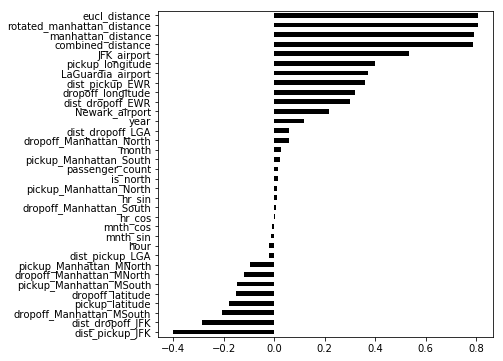

In [6]:
df.corr()['fare_amount'].drop('fare_amount').sort_values().plot.barh(color='black', figsize=(6,6))

Text(0.5, 1.0, 'Distribution of taxi trips')

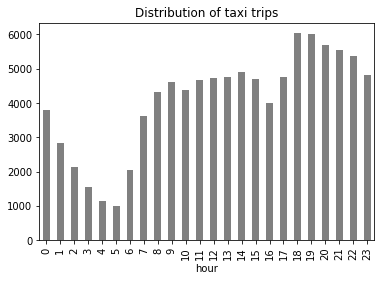

In [7]:
df.groupby('hour').size().plot(kind='bar',color='grey')
plt.title('Distribution of taxi trips')

Text(0.5, 1.0, 'All taxi trips')

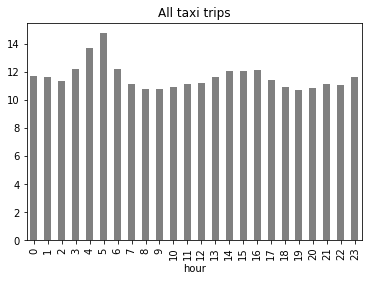

In [8]:
df.groupby('hour')['fare_amount'].mean().plot(kind='bar',color='grey')
plt.title('All taxi trips')

Text(0.5, 1.0, 'All taxi trips excl. airport trips')

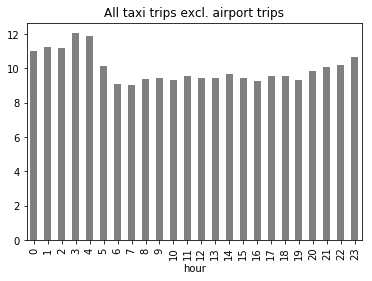

In [9]:
df[~(df.zone_pickup.str.contains('Airport')) & ~(df.zone_dropoff.str.contains('Airport'))].groupby('hour')['fare_amount'].mean().plot(kind='bar',color='grey')
plt.title('All taxi trips excl. airport trips')

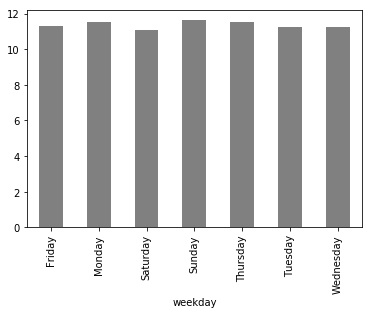

In [10]:
df.groupby('weekday')['fare_amount'].mean().plot(kind='bar',color='grey')

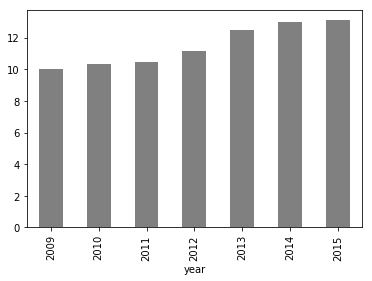

In [11]:
df.groupby('year')['fare_amount'].mean().plot(kind='bar',color='grey')

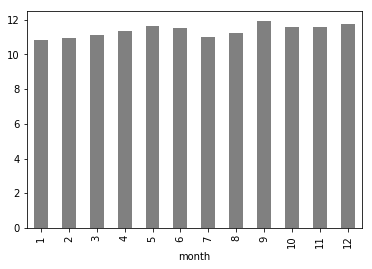

In [12]:
df.groupby('month')['fare_amount'].mean().plot(kind='bar',color='grey')

### Boroughs

In [13]:
df.pivot_table(index=['borough_pickup','borough_dropoff'], values='fare_amount',aggfunc=['mean','count'],fill_value=0)
#Use melt somehow to plot?

mean       count
                               fare_amount fare_amount
borough_pickup borough_dropoff                        
Bronx          Bronx             10.437500          55
               Brooklyn          42.250000           2
               Manhattan         15.578125          23
               No borogh          6.500000           1
               North New York    13.703125           1
               Queens            42.187500           3
Brooklyn       Brooklyn           9.984375        1282
               East New York    112.000000           1
               Manhattan         16.312500         745
               No borogh          8.125000           4
               Queens            23.953125         115
EWR            EWR               68.812500           6
East New York  East New York     69.250000          13
               Manhattan         22.593750           3
               Queens            45.000000           1
Manhattan      Bronx             26.906250         384
               Brooklyn          19.468750        2990
               EWR               68.562500         118
               East New York     64.437500           6
               Manhattan          8.929688       83023
               No borogh         10.875000          60
               North New York    46.000000          13
               Queens            29.984375        3387
               South New York    69.187500           2
               Staten Island     52.125000           9
               West New York     39.062500          67
No borough     Bronx             11.703125           4
               Brooklyn          10.343750           5
               Manhattan         12.773438          63
               No borogh         15.710938          36
               Queens            20.359375           9
               West New York     14.515625           5
North New York Bronx              8.101562           1
               Manhattan         15.835938          10
               North New York    28.046875          36
               Queens            37.718750           3
Queens         Bronx             41.656250          43
               Brooklyn          33.031250         527
               EWR               97.750000           2
               East New York     47.812500          35
               Manhattan         36.156250        2728
               No borogh         22.937500           7
               North New York    70.125000          12
               Queens            16.796875        1482
               Staten Island     76.812500           3
               West New York    113.312500           7
South New York EWR               67.500000           1
               South New York    45.843750           7
Staten Island  Staten Island     11.398438           4
West New York  Bronx             34.093750           1
               Brooklyn          24.093750           1
               Manhattan         15.820312          24
               No borogh         22.859375           4
               Queens            23.125000           2
               South New York    13.703125           1
               West New York     23.875000         104

Note the data sparsity; one cannot really trust those boroughs with few observations; should train with more data (or less boroughs). This might not be an issue if one trains with all 55M taxi trips.

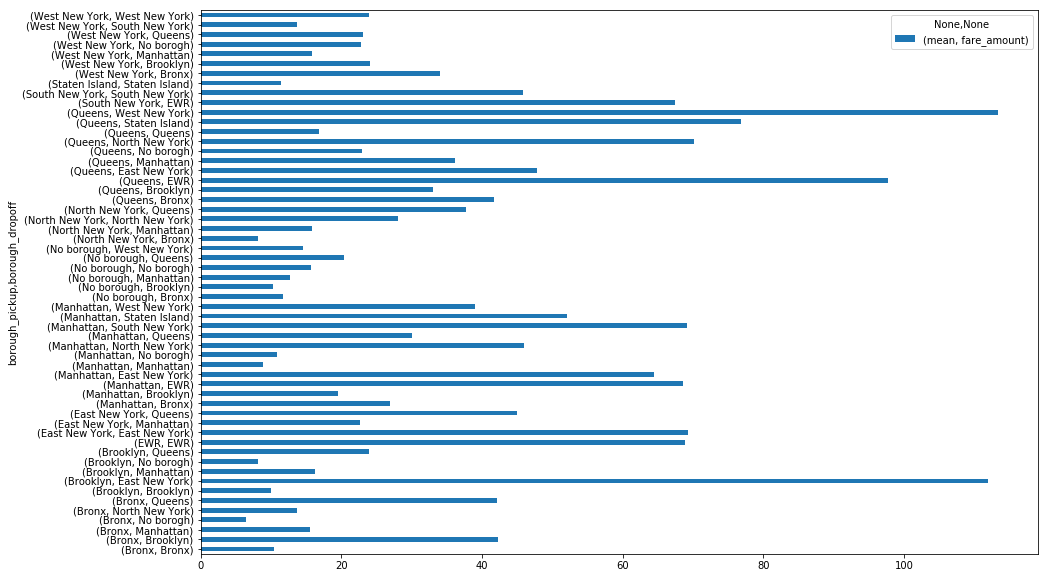

In [14]:
df.pivot_table(index=['borough_pickup','borough_dropoff'], values='fare_amount',aggfunc=['mean']).plot.barh(figsize=(15,10))

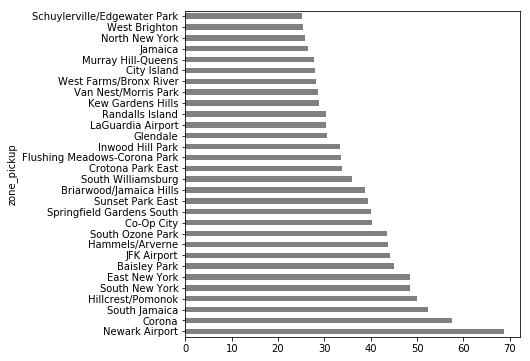

In [15]:
df.groupby('zone_pickup')['fare_amount'].mean().nlargest(30).plot.barh(color='grey', figsize=(6,6))

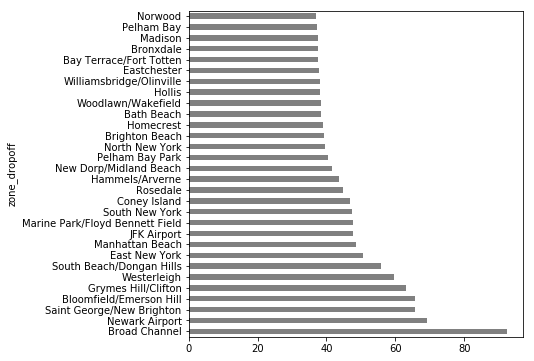

In [16]:
df.groupby('zone_dropoff')['fare_amount'].mean().nlargest(30).plot.barh(color='grey',figsize=(6,6))

#### Manhattan taxi zones

In [17]:
mh=df[(df.borough_pickup == 'Manhattan') & (df.borough_dropoff == 'Manhattan')]
a=mh.pivot_table(index=['zone_pickup','zone_dropoff'], values='fare_amount',
               aggfunc=['mean','count'],fill_value=0)
a.columns=a.columns.map('_'.join)
a=a.reset_index()
a[a.count_fare_amount>5].nlargest(20,'mean_fare_amount')
#a.reset_index().nlargest(10,'fare_amount')

,zone_pickup,zone_dropoff,mean_fare_amount,count_fare_amount
2171,Penn Station/Madison Sq West,Washington Heights North,28.625000,6
2696,Upper East Side North,Battery Park City,27.796875,6
527,East Chelsea,Washington Heights North,27.234375,7
1021,Greenwich Village North,Morningside Heights,25.750000,7
775,Financial District South,Lenox Hill West,25.578125,6
1589,Lower East Side,Morningside Heights,25.468750,7
2172,Penn Station/Madison Sq West,Washington Heights South,25.421875,7
856,Flatiron,Washington Heights North,25.296875,8
1875,Midtown East,Washington Heights South,24.968750,6
1308,Lenox Hill East,Washington Heights North,24.734375,6


In [18]:
def plot_zone_trips(df,zone_pickup,zone_dropoff):
    df.set_geometry('geometry_pickup')[(df.zone_pickup==zone_pickup) & (df.zone_dropoff==zone_dropoff)].plot(label='pickup',color='yellow',ax=ax)
    df.set_geometry('geometry_dropoff')[(df.zone_pickup==zone_pickup) & (df.zone_dropoff==zone_dropoff)].plot(label='dropoff',color='red',ax=ax)
    df.set_geometry('taxi_line')[(df.zone_pickup==zone_pickup) & (df.zone_dropoff==zone_dropoff)].plot(alpha=0.2, color='black',ax=ax)

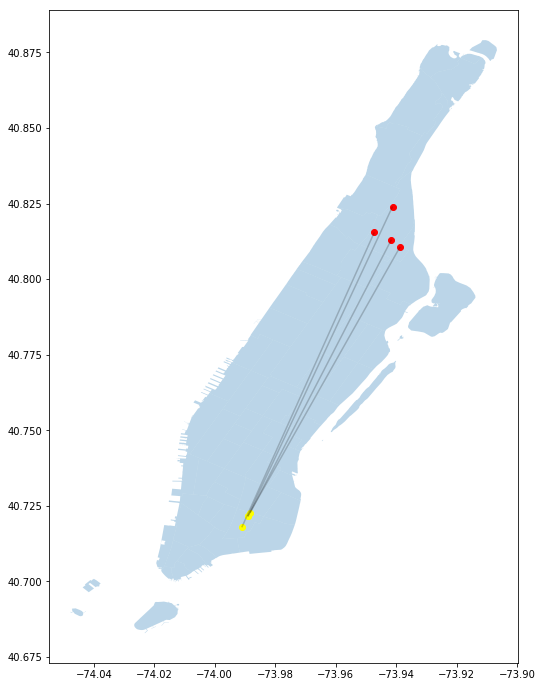

In [19]:
f, ax = plt.subplots(figsize=(15,12))
nyc_zones[nyc_zones.borough=='Manhattan'].plot(column='borough',alpha=0.3,ax=ax)
plot_zone_trips(mh,zone_pickup='Lower East Side',zone_dropoff='Central Harlem North')
# plot_zone_trips(mh,zone_pickup='East Village',zone_dropoff='Lincoln Square East')
# plot_zone_trips(mh,zone_pickup='Union Sq',zone_dropoff='Upper West Side South')

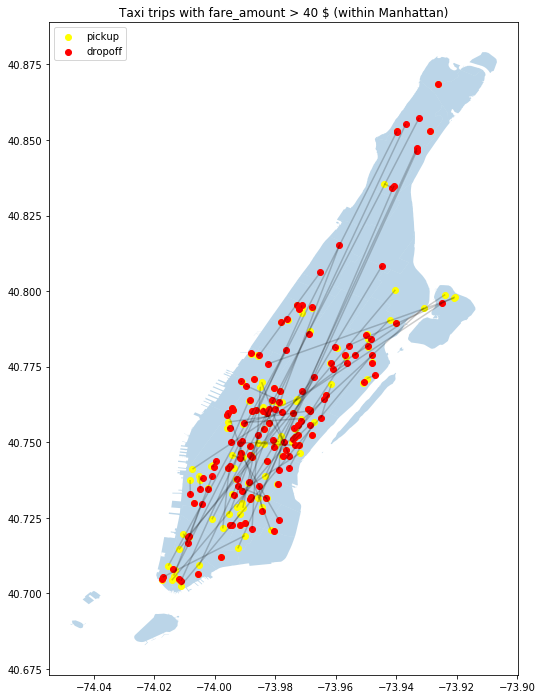

In [20]:
f, ax = plt.subplots(figsize=(15,12))
nyc_zones[nyc_zones.borough=='Manhattan'].plot(column='borough',alpha=0.3,ax=ax)
price = 40
foo=mh[df.fare_amount>price]
foo.set_geometry('geometry_pickup').plot(label='pickup',color='yellow',ax=ax)
foo.set_geometry('geometry_dropoff').plot(label='dropoff',color='red',ax=ax)
foo.set_geometry('taxi_line').plot(alpha=0.2, color='black',ax=ax)
plt.title('Taxi trips with fare_amount > {} $ (within Manhattan)'.format(price))
plt.legend(loc='upper left')

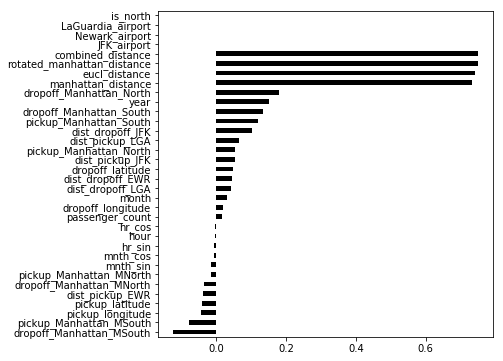

In [21]:
mh.corr()['fare_amount'].drop('fare_amount').sort_values().plot.barh(color='black', figsize=(6,6))

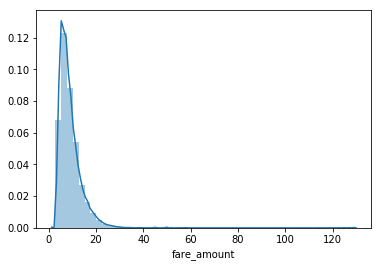

In [22]:
sns.distplot(mh.fare_amount)

### Fare amount vs. distance
It is possible to create a new feature which gives the fare amount per distance, e.g. `df['fare_per_distance']= df['fare_amount']/df['distance']`. This feature may be misleading, however, since only the pickup and dropoff location of the trips are given. There may be trips where start and stop location are close to each other (short distance), but where the taxi in reality has driven much longer (high fare amount). It is not possible to deduce the actual distance, hence it is decided not to create features such as this.

Text(0.5, 1.0, 'Taxi trips with fare_amount < 4 $')

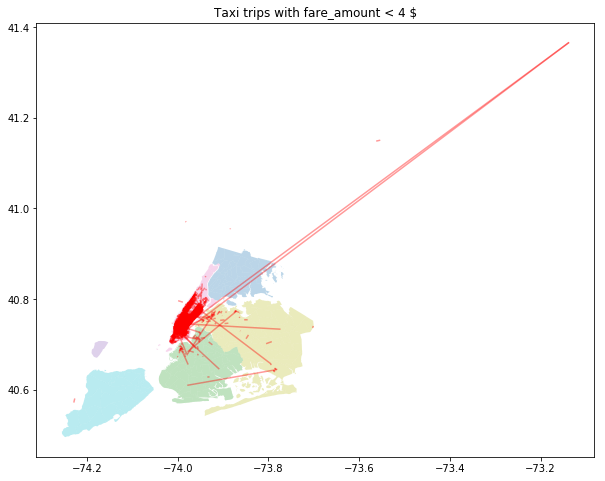

In [23]:
f, ax = plt.subplots(figsize=(10,8))
nyc_zones.plot(column='borough',alpha=0.3,ax=ax)
price = 4
df[df.fare_amount<price].set_geometry('taxi_line').plot(alpha=0.4, color='red',ax=ax)
plt.title('Taxi trips with fare_amount < {} $'.format(price))

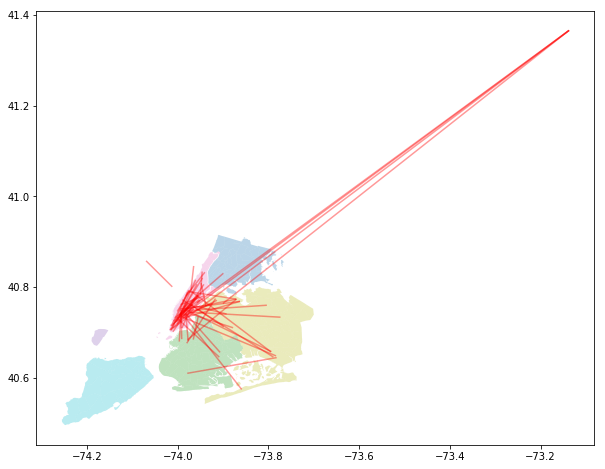

In [24]:
f, ax = plt.subplots(figsize=(10,8))
nyc_zones.plot(column='borough',alpha=0.3,ax=ax)
df[(df.eucl_distance>5000) & (df.fare_amount<5)].set_geometry('taxi_line').plot(alpha=0.4, color='red',ax=ax)

Trips where the distance is larger than some value and and the price is lower than some value should probably be removed before training.

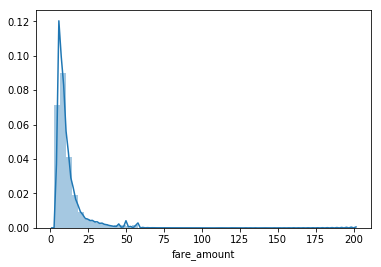

In [25]:
sns.distplot(df.fare_amount)

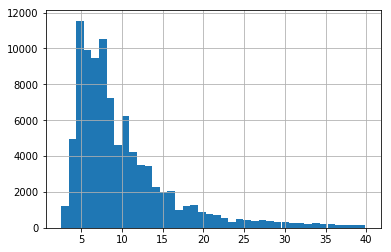

In [26]:
pd.DataFrame(df[df.fare_amount<40]).fare_amount.hist(bins=40)

Could perhaps visualise this in QGIS by dividing into bins somehow, or perform some clustering.

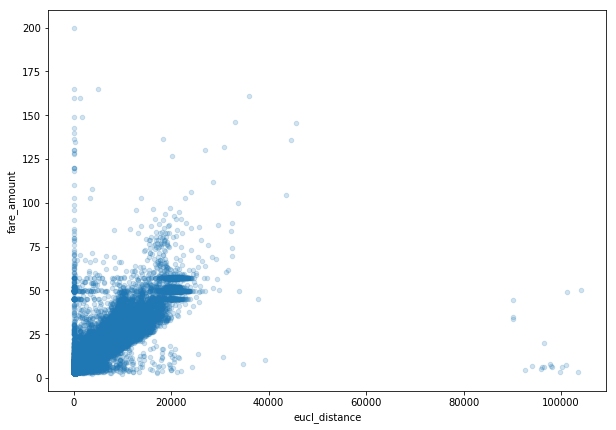

In [27]:
pd.DataFrame(df).plot.scatter(x='eucl_distance',y='fare_amount',alpha=0.2,figsize=(10,7))
#Must convert to dataframe since geopandas does not allow scatter

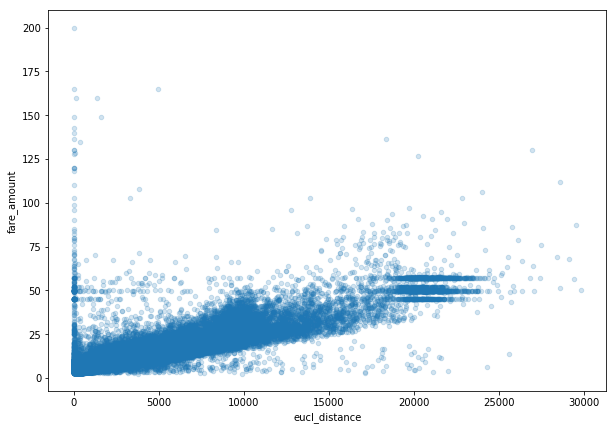

In [28]:
pd.DataFrame(df[df.eucl_distance<30000]).plot.scatter(x='eucl_distance',y='fare_amount',alpha=0.2,figsize=(10,7))

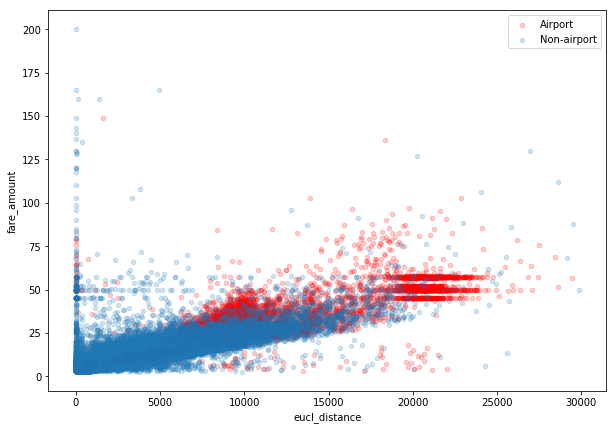

In [29]:
f, ax = plt.subplots(figsize=(10,7))

pd.DataFrame(df[(df.eucl_distance<30000) & ((df.zone_pickup.str.contains('Airport')) | (df.zone_dropoff.str.contains('Airport')))]).plot.scatter(x='eucl_distance',
                                                                                                            y='fare_amount',alpha=0.2, color='r', label='Airport',ax=ax)
pd.DataFrame(df[(df.eucl_distance<30000) & ~((df.zone_pickup.str.contains('Airport')) | (df.zone_dropoff.str.contains('Airport')))]).plot.scatter(x='eucl_distance',
                                                                                                            y='fare_amount',alpha=0.2,label='Non-airport',ax=ax)
plt.legend(loc='upper right')
#df[~((df.zone_pickup.str.contains('Airport')) | (df.zone_dropoff.str.contains('Airport')))]

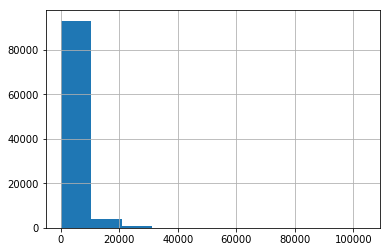

In [30]:
pd.DataFrame(df).eucl_distance.hist()

In [31]:
df['eucl_distance'].max()

104079.05818201303

### Trips with zero distance
Create a separate model for these? Or do something more clever?

In [32]:
df[df['eucl_distance']==0]['fare_amount'].describe()

count    995.000000
mean      12.054688
std       15.593750
min        2.900391
25%        5.000000
50%        6.898438
75%       10.500000
max      143.000000
Name: fare_amount, dtype: float64

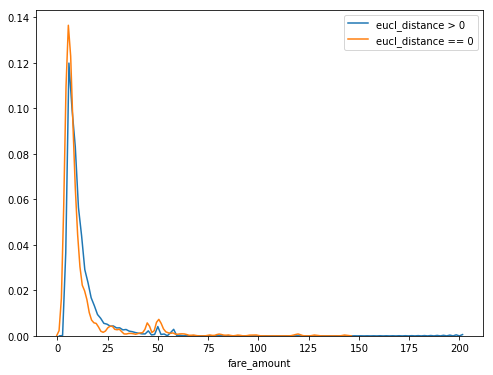

In [33]:
#sns.distplot(df[df['distance']==0]['fare_amount'])
f, ax = plt.subplots(figsize=(8,6))
sns.distplot(df[df['eucl_distance']>0]['fare_amount'],hist=False,label='eucl_distance > 0',ax=ax)
sns.distplot(df[df['eucl_distance']==0]['fare_amount'],hist=False,label='eucl_distance == 0',ax=ax)

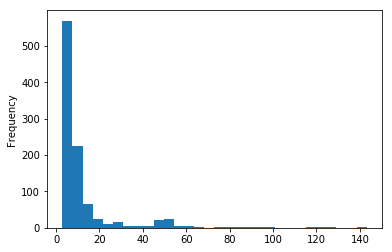

In [34]:
df[df['eucl_distance']==0]['fare_amount'].plot.hist(bins=30)

In [35]:
df[df['eucl_distance']==0].pivot_table(index=['borough_pickup','borough_dropoff'], values='fare_amount',aggfunc=['mean','count'],fill_value=0)

,,mean,count
,,fare_amount,fare_amount
borough_pickup,borough_dropoff,,
Bronx,Bronx,11.500000,16
Brooklyn,Brooklyn,11.437500,62
EWR,EWR,75.812500,1
East New York,East New York,81.687500,4
Manhattan,Manhattan,8.789062,662
No borough,No borogh,11.468750,18
North New York,North New York,19.390625,25
Queens,Queens,16.406250,178


In [36]:
df[df['eucl_distance']==0].groupby(['weekday']).mean()['fare_amount']

weekday
Friday       10.257812
Monday       11.710938
Saturday     13.500000
Sunday       14.593750
Thursday     11.781250
Tuesday      10.640625
Wednesday    12.335938
Name: fare_amount, dtype: float16

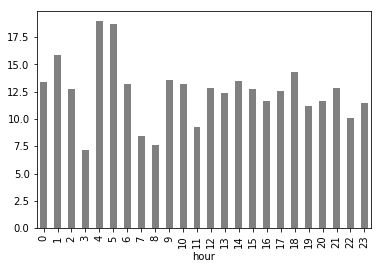

In [37]:
df[df['eucl_distance']==0].groupby(['hour']).mean()['fare_amount'].plot.bar(color='grey')

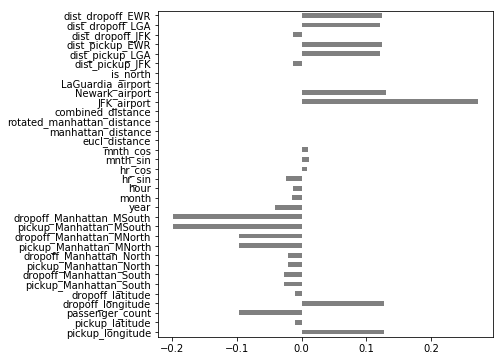

In [38]:
df[df['eucl_distance']==0].corr().drop(['fare_amount'])['fare_amount'].plot.barh(color='grey', figsize=(6,6))

Text(0.5, 1.0, 'Taxi trips with zero distance (pickups)')

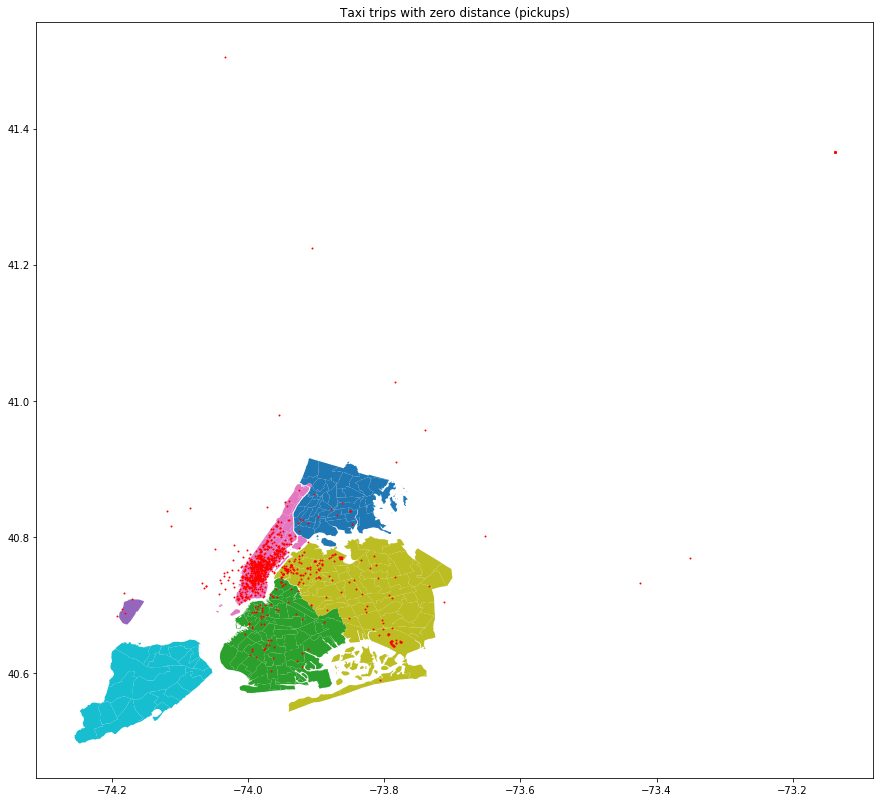

In [39]:
f,ax=plt.subplots(figsize=(15,15))
nyc_zones.plot(column='borough',ax=ax)
df.set_geometry('geometry_pickup')[df['eucl_distance']==0].plot(color='r', markersize=0.9,ax=ax)
plt.title('Taxi trips with zero distance (pickups)')

Text(0.5, 1.0, 'Taxi trips with zero distance (dropoffs)')

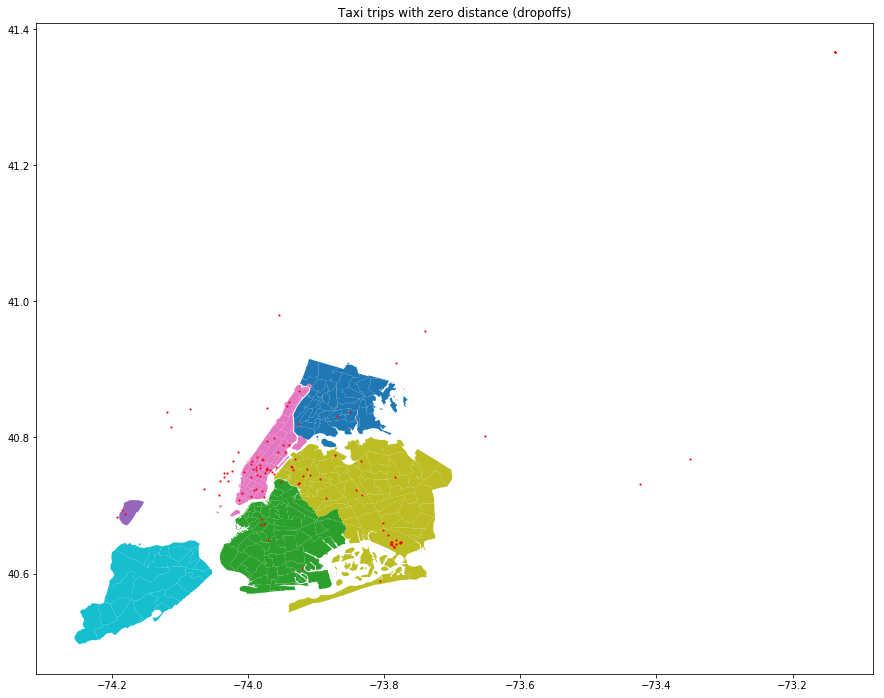

In [40]:
f,ax=plt.subplots(figsize=(15,15))
nyc_zones.plot(column='borough',ax=ax)
df.set_geometry('geometry_pickup')[(df['eucl_distance']==0) & (df['fare_amount']>20)].plot(color='r', markersize=1.2,ax=ax)
plt.title('Taxi trips with zero distance (dropoffs)')

### Special areas

Airports. There are perhaps also other areas of interest? (Did not find anything special when looking at the data in QGIS)

<img src="qgis/laguardia.png" alt="drawing" width="1000"/>

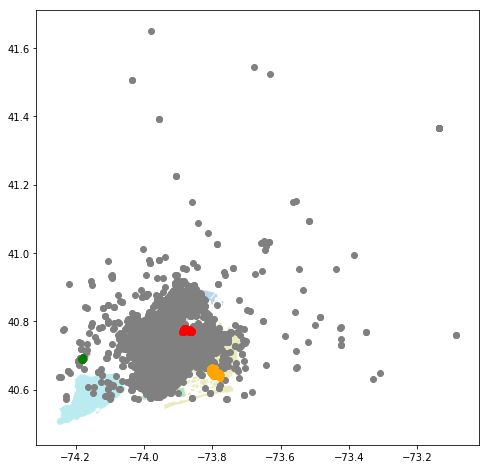

In [41]:
non_airport=df[~(df.zone_pickup.str.contains('Airport')) | ~(df.zone_pickup.str.contains('Airport'))]
f, ax = plt.subplots(figsize=(10,8))
nyc_zones.plot(column='borough',alpha=0.3,ax=ax)
non_airport.set_geometry('geometry_pickup').plot(color='grey',ax=ax)
non_airport.set_geometry('geometry_dropoff').plot(color='grey',ax=ax)
df.set_geometry('geometry_pickup')[df.zone_pickup=='JFK Airport'].plot(label='JFK Airport',color='orange',ax=ax)
df.set_geometry('geometry_pickup')[df.zone_pickup=='Newark Airport'].plot(label='Newark Airport',color='g',ax=ax)
df.set_geometry('geometry_pickup')[df.zone_pickup=='LaGuardia Airport'].plot(label='LaGuardia Airport',color='r',ax=ax)

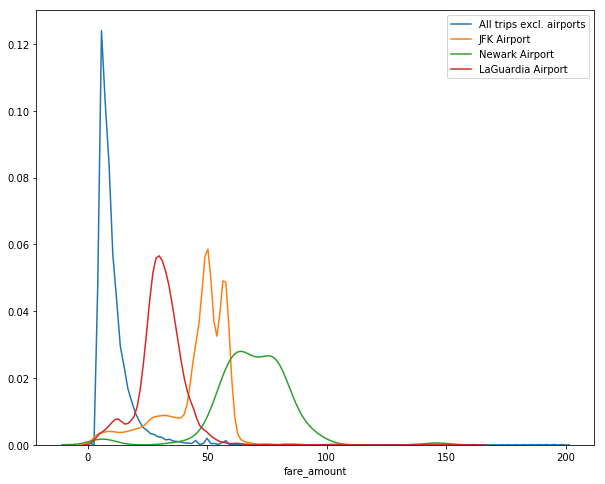

In [42]:
f, ax = plt.subplots(figsize=(10,8))
sns.distplot(non_airport.fare_amount,hist=False,label='All trips excl. airports',ax=ax)
sns.distplot(df[(df.zone_pickup=='JFK Airport') | (df.zone_dropoff=='JFK Airport')].fare_amount,hist=False,label='JFK Airport',ax=ax)
sns.distplot(df[(df.zone_pickup=='Newark Airport') | (df.zone_dropoff=='Newark Airport')].fare_amount,hist=False,label='Newark Airport',ax=ax)
sns.distplot(df[(df.zone_pickup=='LaGuardia Airport') | (df.zone_dropoff=='LaGuardia Airport')].fare_amount,hist=False,label='LaGuardia Airport',ax=ax)

### Test set exploration

This set may be studied closely to adjust the features and model to get the best possible public score. The model may then not generalise well to other test sets, however.

In [43]:
df_test = pd.read_pickle('data/processed/gdf_test.pkl')
df_test.tail()

,key,pickup_datetime,pickup_longitude,pickup_latitude,passenger_count,geometry_pickup,zone_pickup,borough_pickup,dropoff_longitude,dropoff_latitude,...,pickup_Manhattan_MNorth,dropoff_Manhattan_MNorth,pickup_Manhattan_MSouth,dropoff_Manhattan_MSouth,dist_pickup_JFK,dist_pickup_LGA,dist_pickup_EWR,dist_dropoff_JFK,dist_dropoff_LGA,dist_dropoff_EWR
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51,-73.968124,40.796997,6,POINT (-73.96812438964844 40.7969970703125),Manhattan Valley,Manhattan,-73.955643,40.780388,...,True,True,False,False,0.241151,0.098816,0.234618,0.221011,0.083964,0.239079
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51,-73.945511,40.803600,6,POINT (-73.94551086425781 40.8036003112793),Central Harlem,Manhattan,-73.960213,40.776371,...,False,True,False,False,0.228726,0.079135,0.257802,0.222197,0.088352,0.233343
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15,-73.991600,40.726608,6,POINT (-73.99160003662109 40.72660827636719),East Village,Manhattan,-73.789742,40.647011,...,False,False,True,False,0.225418,0.128986,0.189062,0.008436,0.151748,0.389877
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19,-73.985573,40.735432,6,POINT (-73.98557281494141 40.73543167114258),Gramercy,Manhattan,-73.939178,40.801731,...,False,False,True,False,0.223303,0.120255,0.196807,0.222914,0.072560,0.262711
9913,2015-01-18 14:06:23.0000006,2015-01-18 14:06:23,-73.988022,40.754070,6,POINT (-73.98802185058594 40.75407028198242),Garment District,Manhattan,-74.000282,40.759220,...,False,False,True,True,0.233742,0.117946,0.199555,0.246985,0.129323,0.189777


In [44]:
df_test.groupby(['borough_pickup','borough_dropoff']).size()

borough_pickup  borough_dropoff
Bronx           Bronx                 7
                Manhattan             1
Brooklyn        Bronx                 1
                Brooklyn            133
                Manhattan            74
                Queens               17
                Staten Island         1
Manhattan       Bronx                40
                Brooklyn            386
                EWR                  11
                East New York         1
                Manhattan          8350
                No borogh             6
                North New York        1
                Queens              344
                Staten Island         1
                West New York        10
No borough      Brooklyn              1
                Manhattan             2
                No borogh             3
                Queens                1
                West New York         2
North New York  Manhattan             4
                North New York        8
Queens  

In [45]:
df_test.eucl_distance.max()

100041.95951394331

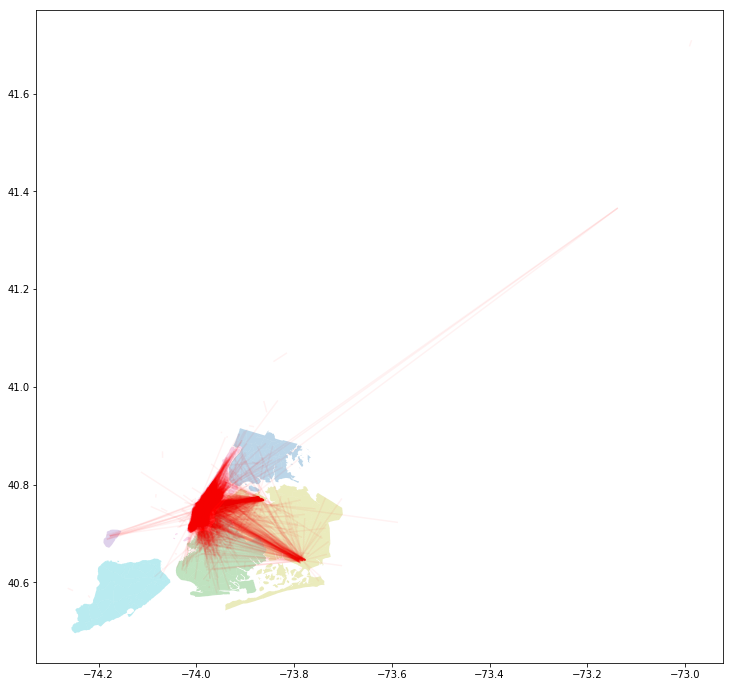

In [46]:
f, ax = plt.subplots(figsize=(15,12))
nyc_zones.plot(column='borough',alpha=0.3,ax=ax)
df_test.set_geometry('taxi_line').plot(alpha=0.05, color='red',ax=ax)

In [47]:
df_test[(df_test.pickup_latitude>41.2) | (df_test.dropoff_latitude>41.2)]

,key,pickup_datetime,pickup_longitude,pickup_latitude,passenger_count,geometry_pickup,zone_pickup,borough_pickup,dropoff_longitude,dropoff_latitude,...,pickup_Manhattan_MNorth,dropoff_Manhattan_MNorth,pickup_Manhattan_MSouth,dropoff_Manhattan_MSouth,dist_pickup_JFK,dist_pickup_LGA,dist_pickup_EWR,dist_dropoff_JFK,dist_dropoff_LGA,dist_dropoff_EWR
2641,2009-11-24 08:58:48.0000006,2009-11-24 08:58:48,-73.137390,41.366138,1,POINT (-73.13739013671875 41.36613845825195),North New York,North New York,-73.137390,41.366138,...,False,False,False,False,0.968236,0.943070,1.240019,0.968236,0.943070,1.240019
4080,2010-06-11 13:37:21.0000004,2010-06-11 13:37:21,-73.137390,41.366138,1,POINT (-73.13739013671875 41.36613845825195),North New York,North New York,-73.984146,40.732925,...,False,False,False,True,0.968236,0.943070,1.240019,0.220979,0.119756,0.197643
5683,2010-05-06 11:35:26.0000003,2010-05-06 11:35:26,-73.137390,41.366138,1,POINT (-73.13739013671875 41.36613845825195),North New York,North New York,-73.137390,41.366138,...,False,False,False,False,0.968236,0.943070,1.240019,0.968236,0.943070,1.240019
5887,2010-07-04 16:44:11.0000002,2010-07-04 16:44:11,-73.137390,41.366138,1,POINT (-73.13739013671875 41.36613845825195),North New York,North New York,-73.982628,40.767239,...,False,False,False,True,0.968236,0.943070,1.240019,0.235633,0.110995,0.209140
6517,2009-06-04 19:34:15.0000001,2009-06-04 19:34:15,-73.137390,41.366138,1,POINT (-73.13739013671875 41.36613845825195),North New York,North New York,-73.137390,41.366138,...,False,False,False,False,0.968236,0.943070,1.240019,0.968236,0.943070,1.240019
7618,2012-01-26 07:33:00.000000181,2012-01-26 07:33:00,-72.986534,41.709557,2,POINT (-72.98653411865234 41.70955657958984),North New York,North New York,-72.990967,41.696682,...,False,False,False,False,1.329993,1.287619,1.567197,1.317030,1.275235,1.555473
8381,2009-07-30 15:49:15.0000002,2009-07-30 15:49:15,-73.137390,41.366138,2,POINT (-73.13739013671875 41.36613845825195),North New York,North New York,-73.137390,41.366138,...,False,False,False,False,0.968236,0.943070,1.240019,0.968236,0.943070,1.240019
8529,2009-11-25 19:32:52.0000001,2009-11-25 19:32:52,-73.137390,41.366138,3,POINT (-73.13739013671875 41.36613845825195),North New York,North New York,-73.986565,40.757965,...,False,False,False,True,0.968236,0.943070,1.240019,0.234334,0.115888,0.202203


### Map visualisations
http://geopandas.org/gallery/plotting_basemap_background.html#sphx-glr-gallery-plotting-basemap-background-py

In [48]:
# import contextily as ctx

# def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
#     xmin, xmax, ymin, ymax = ax.axis()
#     basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
#     ax.imshow(basemap, extent=extent, interpolation='bilinear')
#     # restore original x/y limits
#     ax.axis((xmin, xmax, ymin, ymax))

In [49]:
# df=df.set_geometry('geometry_pickup', crs='epsg:4326')
# df = df.to_crs(epsg=3857)
# ax = df.plot(figsize=(10, 10), alpha=0.5, c='r',marker='.')
# add_basemap(ax, zoom=11, url=ctx.sources.ST_TONER_LITE)
# ax.set_axis_off()
# ax.set_title('Pickups')

In [50]:
# df=df.set_geometry('geometry_dropoff')
# gdf = df.to_crs(epsg=3857)
# ax = gdf.plot(figsize=(10, 10), alpha=0.5, c='b',marker='.')
# add_basemap(ax, zoom=11, url=ctx.sources.ST_TONER_LITE)
# ax.set_axis_off()
# ax.set_title('Dropoffs')

Text(0.5, 1.0, 'n_dropoff')

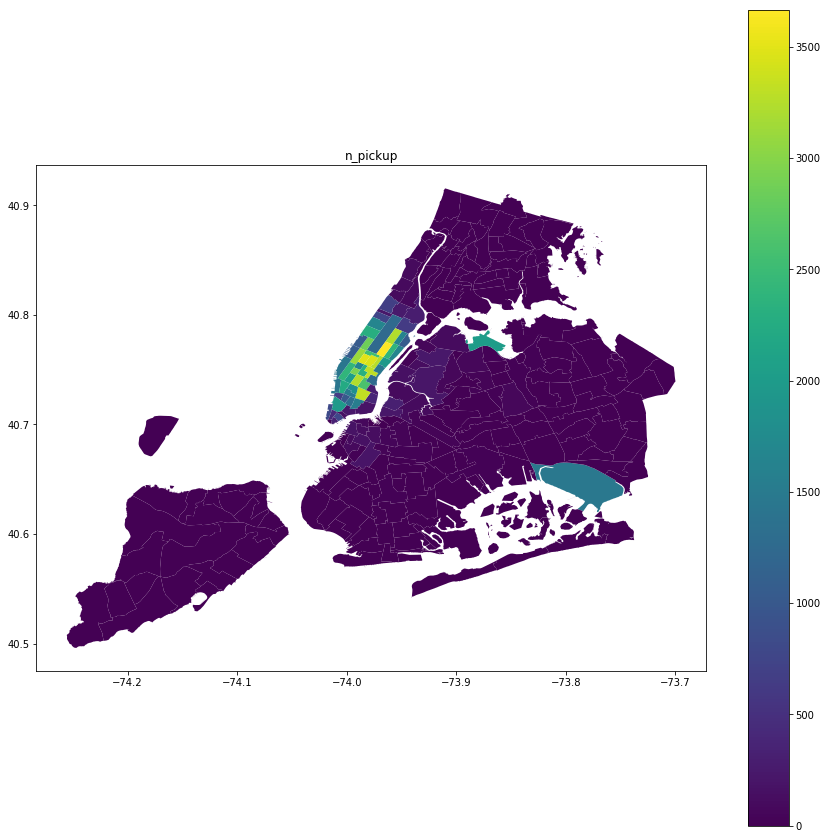

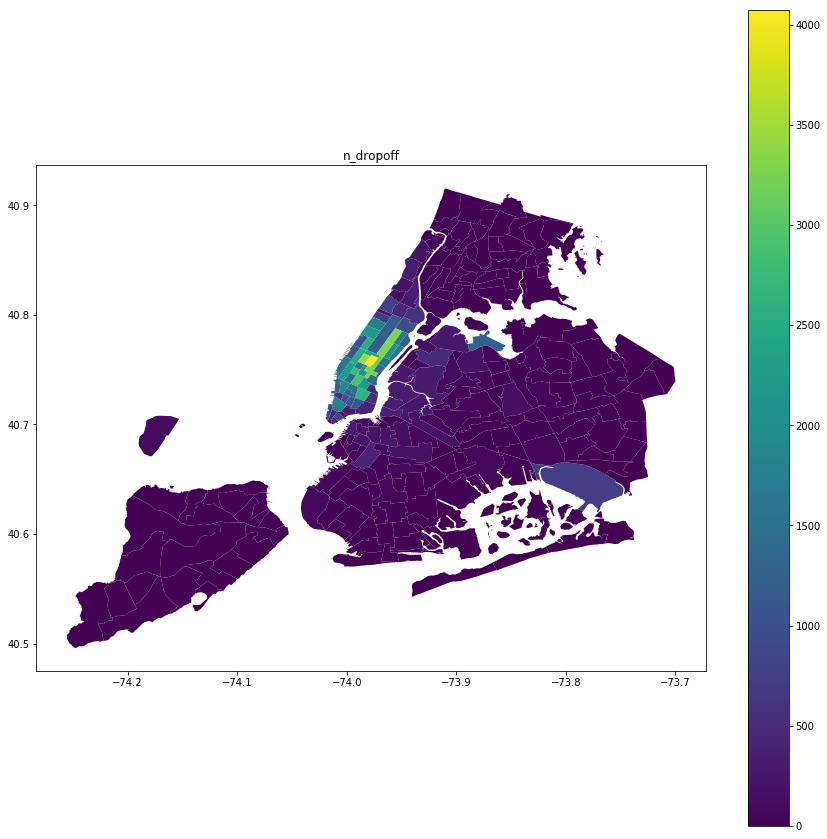

In [51]:
zones_fp='data/raw/taxi_zones.shp'
nyc_zones=gpd.read_file(zones_fp)
nyc_zones=nyc_zones.to_crs(crs={'init': 'epsg:4326'})

n_pickup=df.groupby('zone_pickup').size().reindex()
n_dropoff=df.groupby('zone_dropoff').size().reindex()
nyc_zones=(nyc_zones.set_index('zone').merge(n_pickup.to_frame(name='n_pickup'),how='left',
    left_index=True,right_index=True).fillna(0))
nyc_zones=(nyc_zones.merge(n_dropoff.to_frame(name='n_dropoff'),how='left',
    left_index=True,right_index=True).fillna(0))
nyc_zones.plot(column='n_pickup',legend=True, figsize=(15,15)) #fix legend location
plt.title('n_pickup')
nyc_zones.plot(column='n_dropoff',legend=True, figsize=(15,15))
plt.title('n_dropoff')